#Node Ranking

Ranking of nodes using betweenness_centrality, eigenvector_centrality_ q1 value and q2 value is the task and we don't know anything about importance of these values.
There are many ranking algorithms, and maybe the problem for this graph is that it is not connected, so we should consider this.
I wanted to compare PangeRank algorithm from netowrkx library, also, I used pygrank - which uses PageRank but improved.
I have read about it on: 
https://www.sciencedirect.com/science/article/pii/S2352711022001455

https://pypi.org/project/pygrank/0.1.17/#ranking-algorithms

At the end, I implemented ranking based on weighted average sum of features that are respectively above mentioned. It is easy to emphasize which feature is most important by assigning the biggest weight to it. I assigned biggest weight to feature x4 since it is the least correlated feature with all the others. (I used kendalltau algorithm from networkx library to check correlation between these features).
Function ReturnRankedNodes returns the sorted list of nodes using this algorithm, and it could be any suitable algorithm - depending on the problems or optimizations we want to solve.

Note: challenge_graph.json needs to be uploaded

First of all, I implemented ranking with PageRank algorithm, to make sure about its usability for this kind of graph. (This was not a part of task)

!pip install pygrank

In [3]:
import json
import logging
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import scipy.stats as stats

def read_json(file):
      try:
        #print('Reading from input')
        with open(file, 'r') as f:
            return json.load(f)
      finally:
        print('Done reading')

d = read_json('/content/challenge_graph.json')
df_1 = pd.DataFrame(d['nodes'])
df_2 = pd.DataFrame(d['links'])

def read_json_file(filename):
    import networkx as nx 
    with open(filename) as f:
        js_graph = json.load(f)
        G = nx.Graph()
    return nx.node_link_graph(js_graph)

G = read_json_file('/content/challenge_graph.json')

Done reading


In [12]:
from pygrank import algorithms

In [17]:
def ReturnIndexFromNode(df_1_in, node_in):
  df_1 = df_1_in
  for i in range(len(df_1['id'])):
    if(df_1['id'][i] == node_in):
      return i

In [25]:
lista_rangiranih = [0 for _ in range(len(df_1['id']))]

In [26]:
from pygrank.algorithms import PageRank
personalization = 'auto'
ranker = PageRank(alpha=0.85, tol=1.E-6)
ranks = ranker.rank(G)
print('Convergence report:', str(ranker.convergence))
index = 0
for v, rank in ranks.items():
    print('The rank of node', v, 'is', rank)
    index = ReturnIndexFromNode(df_1, v)
    lista_rangiranih[index] = rank


Convergence report: 35 iterations (0.0074960090000786295 sec)
The rank of node 48633953191 is 5.852428258718209
The rank of node 1438155667 is 5.826168497941845
The rank of node 37754729913 is 5.312407875026742
The rank of node 45694946584 is 5.814430556528822
The rank of node 8048097398 is 5.689384801556341
The rank of node 246800250 is 5.96214057942862
The rank of node 18866083059 is 6.047623638026666
The rank of node 27449814345 is 5.679382549282207
The rank of node 12762152189 is 5.959040409449698
The rank of node 46105172901 is 6.048571047914405
The rank of node 5693320415 is 6.0149972648176115
The rank of node 429008541 is 7.737003995756712
The rank of node 3104137586 is 5.7826441118472385
The rank of node 55714809789 is 5.650009827976304
The rank of node 382387161 is 5.978014128322784
The rank of node 1957459102 is 5.866485291626524
The rank of node 35984678 is 6.593009168086488
The rank of node 555363279 is 8.12225625857439
The rank of node 14766909 is 7.770845797712408
The ran

In [68]:
index_max = 0
max_value = max(lista_rangiranih)
for i in range(len(lista_rangiranih)):
  if(lista_rangiranih[i] == max_value):
    index_max = i

print(index_max)
print(max_value)
print('Using PageRank algorithm from pygrank, the best ranked node is', df_1['id'][37], ', whose index is', index_max, ', with rank = ', max_value)

37
8.73877959235022
Using PageRank algorithm from pygrank, the best ranked node is 180647838 , whose index is 37 , with rank =  8.73877959235022


In [74]:
import networkx as nx
pr=nx.pagerank(G, alpha=0.85)
#print(pr)

max_value_nx = max(pr)
max_index_nx = 0
max_index_nx = ReturnIndexFromNode(df_1, max_value_nx)
print('Page Rank algorithm, implemented in networkx library, returns the', df_1['id'][max_index_nx],' as the top ranked node, whose index is', max_index_nx)

Page Rank algorithm, implemented in networkx library, returns the 999504161  as the top ranked node, whose index is 520


In [30]:
import scipy.stats as stats
btw_cntr = nx.betweenness_centrality(G)

#x2 = nx.eigenvector_centrality(G)                            NetworkXNotImplemented: not implemented for multigraph type
G2 = nx.DiGraph(G)
eig_cntr = nx.eigenvector_centrality(G2, max_iter=1000)


After extracting betweenness_centrality and eigenvector_centrality, I wanted to check the correlation between these values for nodes, using Kendalltau correlation coefficient.


"Kendall’s tau is a measure of the correspondence between two rankings. Values close to 1 indicate strong agreement, and values close to -1 indicate strong disagreement. This implements two variants of Kendall’s tau: tau-b (the default) and tau-c (also known as Stuart’s tau-c). These differ only in how they are normalized to lie within the range -1 to 1; the hypothesis tests (their p-values) are identical."

The p-value for a hypothesis test whose null hypothesis is an absence of association, tau = 0.


In [31]:
x1 = list(btw_cntr.values())
x2 = list(eig_cntr.values())
x3 = list(df_1['q1'])
x4 = list(df_1['q2'])

In [33]:
tau_12, p_value_12 = stats.kendalltau(x1, x2)
print(tau_12)
print(p_value_12)
print('Tau and p coeff for (btw_cntr) and (eign_cntr) are', tau_12, p_value_12)  #τb = 0 indicates no monotonous relation at all;

0.24402932295188412
6.575381840910246e-71
Tau and p coeff for (btw_cntr) and (eign_cntr) are 0.24402932295188412 6.575381840910246e-71


In [34]:
tau_13, p_value_13 = stats.kendalltau(x1, x3)
print(tau_13)
print(p_value_13)
print('Tau and p coeff for (btw_cntr) and (q1 value) are', tau_13, p_value_13)   #low correlation between these values

0.05821789507268604
1.8189492190859282e-05
Tau and p coeff for (btw_cntr) and (q1 value) are 0.05821789507268604 1.8189492190859282e-05


In [39]:
tau_14, p_value_14 = stats.kendalltau(x1, x4)
print(tau_14)
print(p_value_14)
print('Tau and p coeff for (btw_cntr) and (q2 value) are', tau_14, p_value_14)   #low correlation between these values

0.04143045769217786
0.00228955731137145
Tau and p coeff for (btw_cntr) and (q2 value) are 0.04143045769217786 0.00228955731137145


In [41]:
tau_23, p_value_23 = stats.kendalltau(x2, x3)
print(tau_23)
print(p_value_23)
print('Tau and p coeff for (eign_cntr) and (q1 value) are', tau_23, p_value_23)   #low correlation between these values

0.19984075478215632
3.4498658690422845e-69
Tau and p coeff for (eign_cntr) and (q1 value) are 0.19984075478215632 3.4498658690422845e-69


In [43]:
tau_24, p_value_24 = stats.kendalltau(x2, x4)
print(tau_24)
print(p_value_24)
print('Tau and p coeff for (eign_cntr) and (q2 value) are', tau_24, p_value_24)   #negative tau meaning no correlation between these values

-0.038238807071100264
0.0007689535806295058
Tau and p coeff for (eign_cntr) and (q2 value) are -0.038238807071100264 0.0007689535806295058


In [44]:
tau_34, p_value_34 = stats.kendalltau(x3, x4)
print(tau_34)
print(p_value_34)
print('Tau and p coeff for (q1 value) and (q2 value) are', tau_34, p_value_34)     #negative tau meaning no correlation between these values

-0.13608134682859113
1.3610675891007086e-33
Tau and p coeff for (q1 value) and (q2 value) are -0.13608134682859113 1.3610675891007086e-33


A value of ± 1 indicates a perfect degree of association between the two variables. As the correlation coefficient value goes towards 0, the relationship between the two variables will be weaker.

Next, I wanted to test also PageRank (from networkx) computes a ranking of the nodes in the graph G based on the structure of the incoming links. It was originally designed as an algorithm to rank web pages.

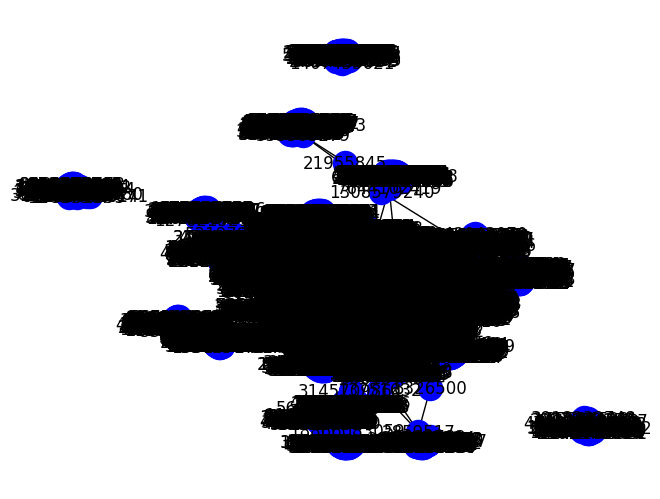

<Figure size 1500x1000 with 0 Axes>

In [54]:
#walk
import random
import matplotlib.pyplot as plt
import operator

#select random graph using gnp_random_graph() function of networkx
Graph = G
nx.draw(Graph, with_labels=True, node_color='blue') #draw the network graph 
plt.figure(figsize=(15,10))
plt.show() #to show the graph by plotting it


In [56]:
lista_tau = [tau_12, tau_13, tau_14, tau_23, tau_24, tau_34]
lista_p = [p_value_12, p_value_13, p_value_14, p_value_23, p_value_34]

print(lista_tau)
print(lista_p)

[0.24402932295188412, 0.05821789507268604, 0.04143045769217786, 0.19984075478215632, -0.038238807071100264, -0.13608134682859113]
[6.575381840910246e-71, 1.8189492190859282e-05, 0.00228955731137145, 3.4498658690422845e-69, 1.3610675891007086e-33]


Since, we don't know what are actually qualities q1 and q2 for the nodes, and their importance, I wanted first to rank nodes by weighted average sum of these attributes which are:
betw_cntr = x1,
eign_cntr = x2, 
q1 = x3, 
q2 = x4.
Since the correlation between x1 and x2 is biggest, I will use the smallest weight for that part, and since there is no correlation between x2 and x4, as well as between x3 and x4, I will give them higher weight in calculating final result.

For every node, I will calculate average sum as
f = (w1*x1+w2*x2+w3*x3+w4*x4)/(w1+w2+w3+w4), and then minimize this cost function, meaning that the node with lowest value f will be the top ranked. 

Descending list of correlation coeff: tau_12, tau_23, tau_13, tau_14, tau_24, tau_34.

These tau values could be used also for weights, but it I will define new for easier understanding. We want to make x4 more important since it has no correlation with x2, and x3, and small correlation with x1. 
w4 = 0.3, w3 = 0.2, w2 = 0.1, w1 = 0.1



In [60]:
w4 = 0.3
w3 = 0.2
w1 = 0.1
w2 = 0.1
sum_weights = w1+w2+w3+w4
f = [0 for _ in range(len(df_1['id']))]

for i in range(len(df_1['id'])):
  f[i] = (w1*x1[i] + w2*x2[i] + w3*x3[i] + w4*x4[i])/sum_weights


In [65]:
#print(f)
max_index_f = 0
max_value_f = 0
for i in range(len(f)):
  if(f[i] > max_value_f):
    max_value_f = f[i]
    max_index_f = i

print('Using weighted average metric to rank nodes it can be obtained that the best ranked node is', df_1['id'][max_index_f], 'whose index is', max_index_f)

Using weighted average metric to rank nodes it can be obtained that the best ranked node is 276192188 whose index is 1526


In [75]:
def ReturnRankedNodes(path):                                                          #'/content/challenge_graph.json'    
  d = read_json(path)
  df_1 = pd.DataFrame(d['nodes'])
  df_2 = pd.DataFrame(d['links'])     
  G = read_json_file(path) 

  btw_cntr = nx.betweenness_centrality(G)
  G2 = nx.DiGraph(G)
  eig_cntr = nx.eigenvector_centrality(G2, max_iter=1000)

  x1 = list(btw_cntr.values())
  x2 = list(eig_cntr.values())
  x3 = list(df_1['q1'])
  x4 = list(df_1['q2'])
  w4 = 0.3
  w3 = 0.2
  w1 = 0.1
  w2 = 0.1
  sum_weights = w1+w2+w3+w4
  f = [0 for _ in range(len(df_1['id']))]

  for i in range(len(df_1['id'])):
    f[i] = (w1*x1[i] + w2*x2[i] + w3*x3[i] + w4*x4[i])/sum_weights

  return f

By choosing an algorithm for this task we didn't have to manually implement it, and actually the discussion is which algorithm is best for disconnected undirected graph.